In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import os

# Path to the dataset
base_dir = "/content/drive/MyDrive/datasetsampah"

# Data augmentation to enhance data variability
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation data
)

# Creating generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Calculating steps_per_epoch
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Using a pretrained model (VGG16)
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callback for early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model
# The following line was unindented to be at the same level as the previous code block
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stop]
)

# Evaluating the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Model Accuracy: {accuracy:.2f}")

Found 12785 images belonging to 2 classes.
Found 3195 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


399/399 ━━━━━━━━━━━━━━━━━━━━ 4140s 10s/step - accuracy: 0.8950 - loss: 0.2790 - val_accuracy: 0.9432 - val_loss: 0.1856
Epoch 2/10
  1/399 ━━━━━━━━━━━━━━━━━━━━ 58s 146ms/step - accuracy: 0.9688 - loss: 0.1623

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


399/399 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9688 - loss: 0.1623 - val_accuracy: 0.9630 - val_loss: 0.3567
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 274s 665ms/step - accuracy: 0.9369 - loss: 0.1692 - val_accuracy: 0.9615 - val_loss: 0.1265
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.2083 - val_accuracy: 0.9630 - val_loss: 0.1731
Epoch 5/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 268s 662ms/step - accuracy: 0.9394 - loss: 0.1545 - val_accuracy: 0.9643 - val_loss: 0.1253
Epoch 6/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.9062 - loss: 0.3669 - val_accuracy: 1.0000 - val_loss: 0.0586
Epoch 7/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 320s 662ms/step - accuracy: 0.9470 - loss: 0.1327 - val_accuracy: 0.9729 - val_loss: 0.0968
Epoch 8/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.9062 - loss: 0.1381 - val_accuracy: 0.9630 - val_loss: 0.0813
Epoch 9/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 265s 653ms/step - accuracy: 0.9548 - loss: 0.1181 - val_a

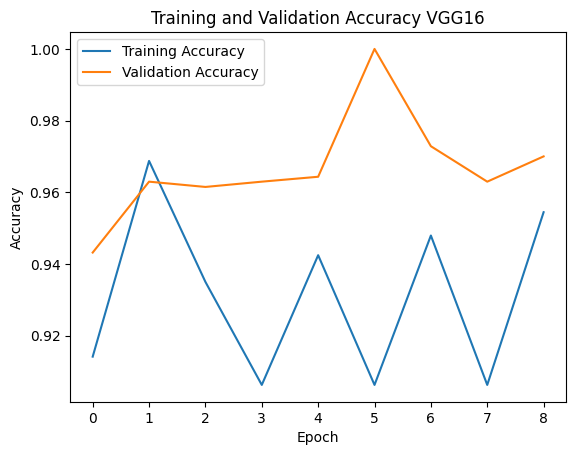

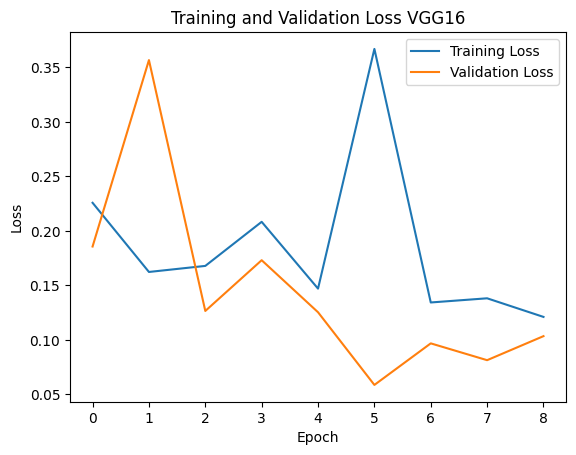

In [3]:
import matplotlib.pyplot as plt

# Plot Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy VGG16')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss VGG16')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       346
         1.0       0.98      0.98      0.98      2822

    accuracy                           0.96      3168
   macro avg       0.90      0.92      0.91      3168
weighted avg       0.96      0.96      0.96      3168


Summary Metrics:
Precision: 0.982
Recall: 0.978
F1-Score: 0.980


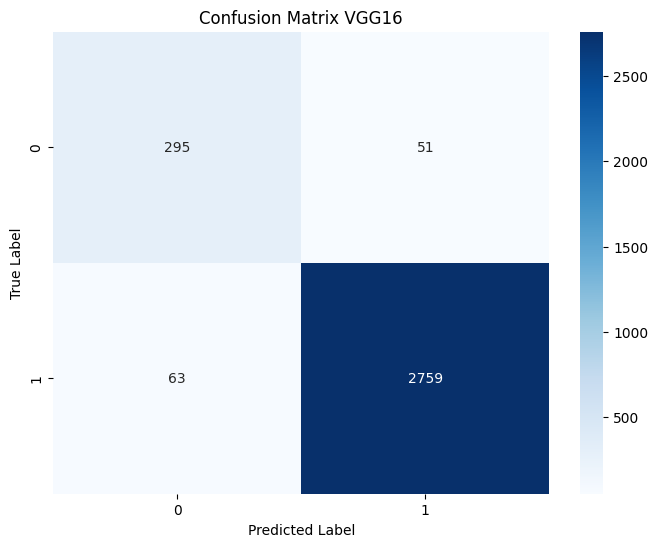

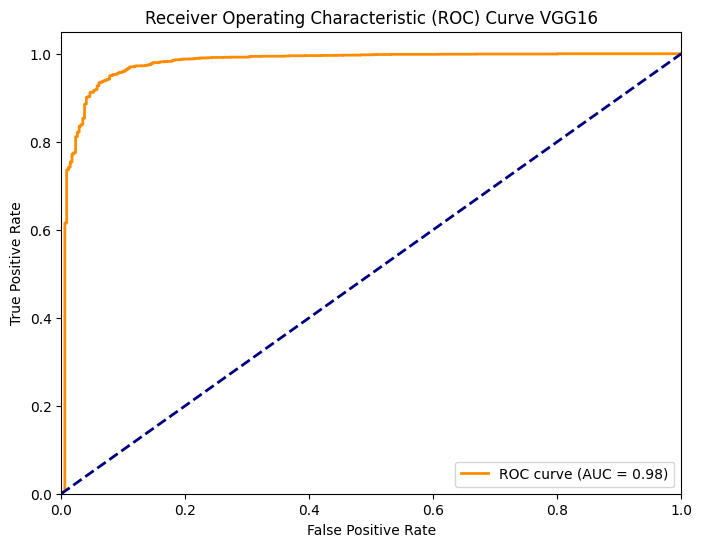

In [4]:
# Proper evaluation code

import numpy as np
validation_generator.reset()
y_pred = []
y_true = []

for i in range(validation_steps):
    x_batch, y_batch = next(validation_generator)
    pred_batch = model.predict(x_batch, verbose=0)
    y_pred.extend(pred_batch)
    y_true.extend(y_batch)

y_pred = np.array(y_pred)
y_true = np.array(y_true)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification metrics
from sklearn.metrics import classification_report, precision_recall_fscore_support

print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred_binary))

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_binary, average='binary')

print("\nSummary Metrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix VGG16')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve VGG16')
plt.legend(loc="lower right")
plt.show()

In [5]:
# Menyimpan model dalam format .h5
model.save('/content/drive/MyDrive/datasetsampah/cnn_vgg16.h5')

print("The model has successfully saved as 'cnn_vgg16.h5' in Google Drive!")


The model has successfully saved as 'cnn_vgg16.h5' in Google Drive!


In [7]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the model and image
model_path = '/content/drive/MyDrive/datasetsampah/cnn_vgg16.h5'
image_path = '/content/drive/MyDrive/datasetsampah/compost/food_waste/food (4).png'

# Load the model
model = load_model(model_path)

# Preprocessing the image
img = load_img(image_path, target_size=(224, 224))  # Resize to match the model's input size
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Prediction
prediction = model.predict(img_array)
class_labels = {0: 'Compost', 1: 'Recyclable'}  # Labels according to data order
predicted_class = class_labels[int(prediction[0] > 0.5)]

print(f"Prediction Result: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Prediction Result: Compost


<ipython-input-7-785e34a00306>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(prediction[0] > 0.5)]
